## Import Libraries & Load Dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv("Data/final_clean_data.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH               45155 non-null  int64  
 2   DAY_OF_WEEK                45155 non-null  int64  
 3   OP_UNIQUE_CARRIER          45155 non-null  object 
 4   ORIGIN                     45155 non-null  object 
 5   ORIGIN_STATE_ABR           45155 non-null  object 
 6   DEST                       45155 non-null  object 
 7   DEST_STATE_ABR             45155 non-null  object 
 8   CRS_DEP_TIME               45155 non-null  float64
 9   DEP_DELAY                  45155 non-null  float64
 10  DEP_DELAY_NEW              45155 non-null  float64
 11  DEP_DEL15                  45155 non-null  float64
 12  DEP_DELAY_GROUP            45155 non-null  float64
 13  CRS_ARR_TIME               45155 non-null  flo

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed
count,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,5.046728,15.877489,3.971321,13.585353,0.125833,3.996368,0.117418,-0.504241,15.123422,183.310597,1175.492703,5.098970,42.800066,59.471664,57.692747,9.810818,8.246529
std,0.808438,8.780866,2.005020,5.287004,10.457920,7.926741,0.321921,0.764952,5.585735,84.569100,732.185970,2.955206,6.723190,9.337098,18.536586,0.983229,3.873726
min,4.000000,1.000000,1.000000,0.080000,-27.000000,0.000000,0.000000,-2.000000,0.020000,49.000000,93.000000,1.000000,5.000000,30.000000,11.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,9.080000,-7.000000,0.000000,0.000000,-1.000000,11.080000,125.000000,679.000000,3.000000,39.000000,53.000000,44.000000,10.000000,6.000000
50%,5.000000,16.000000,4.000000,12.970000,-3.000000,0.000000,0.000000,-1.000000,15.680000,166.000000,978.000000,4.000000,43.000000,58.000000,59.000000,10.000000,8.000000
75%,6.000000,23.000000,6.000000,17.900000,4.000000,4.000000,0.000000,0.000000,19.220000,244.000000,1721.000000,7.000000,48.000000,65.000000,71.000000,10.000000,10.000000
max,6.000000,31.000000,7.000000,23.980000,35.000000,35.000000,1.000000,2.000000,23.980000,411.000000,2724.000000,11.000000,60.000000,102.000000,100.000000,10.000000,30.000000


## Distribution of Numeric Features

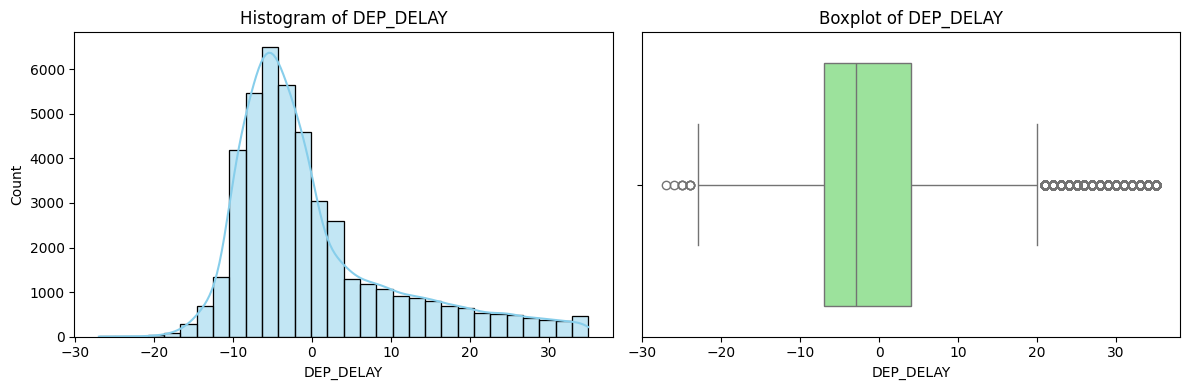

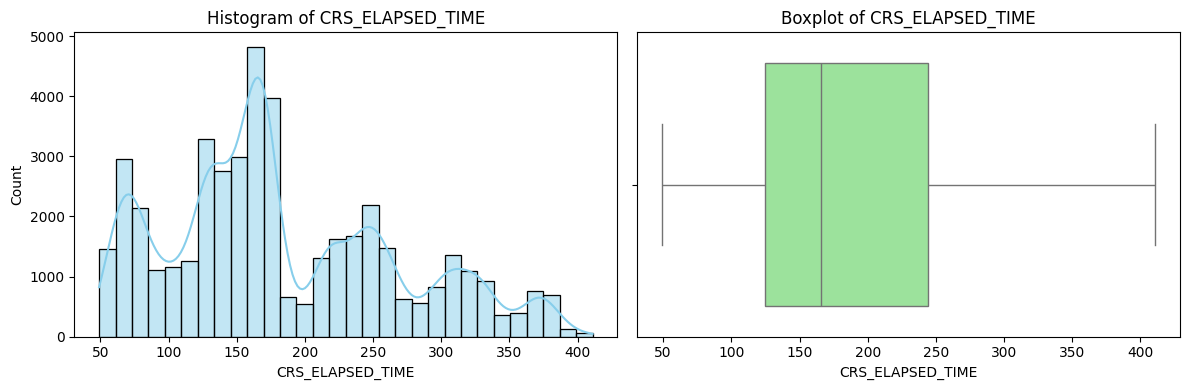

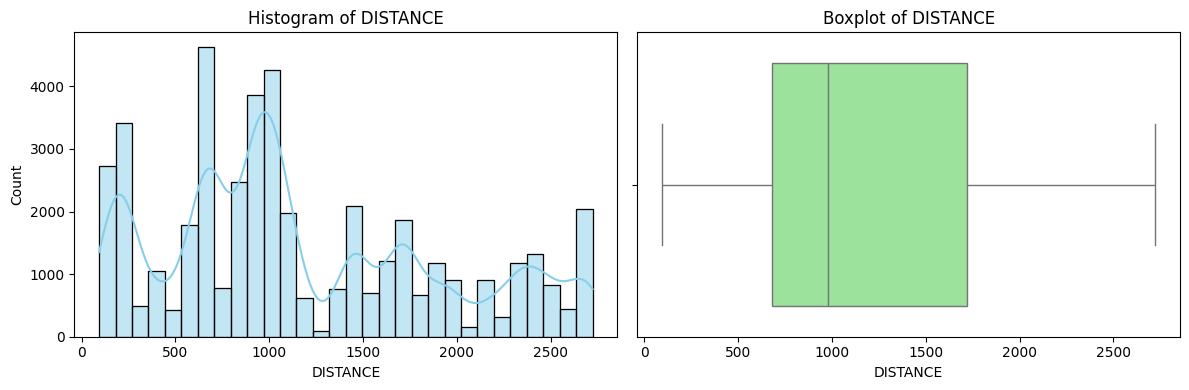

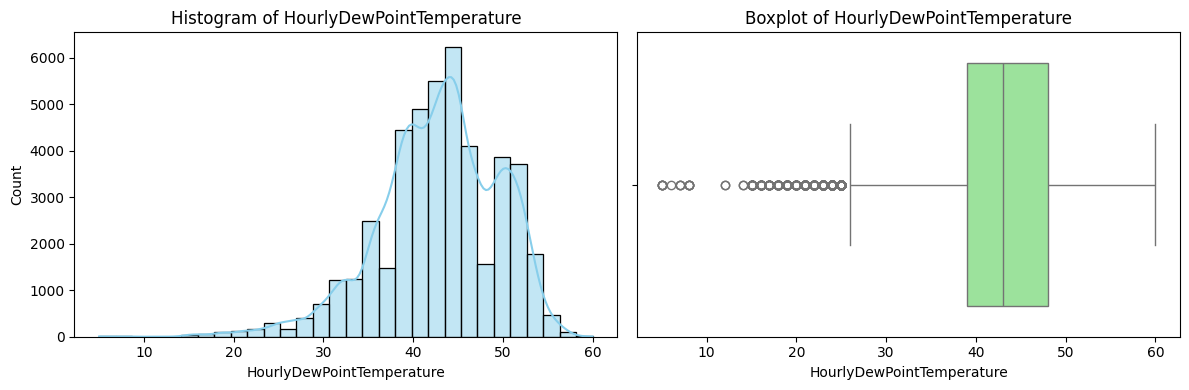

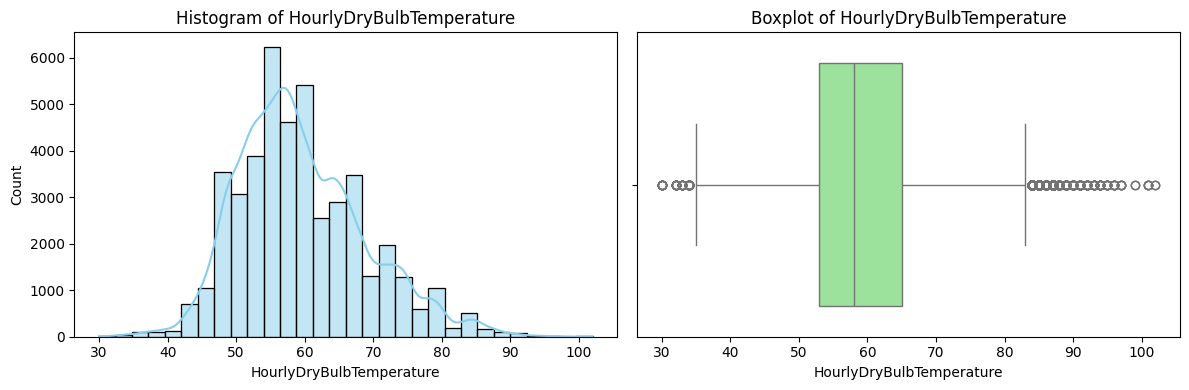

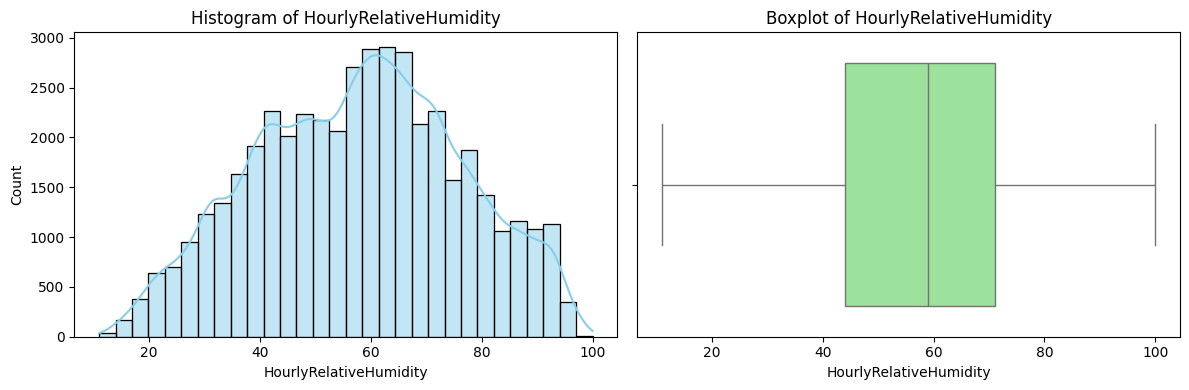

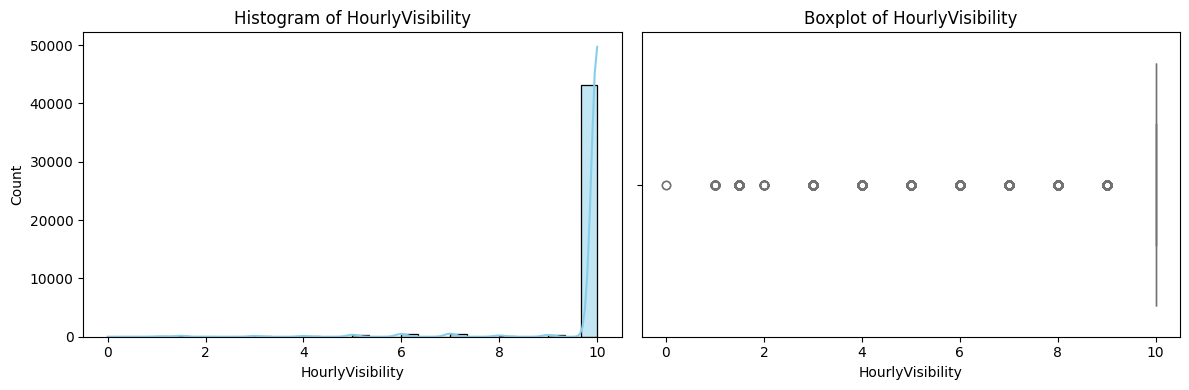

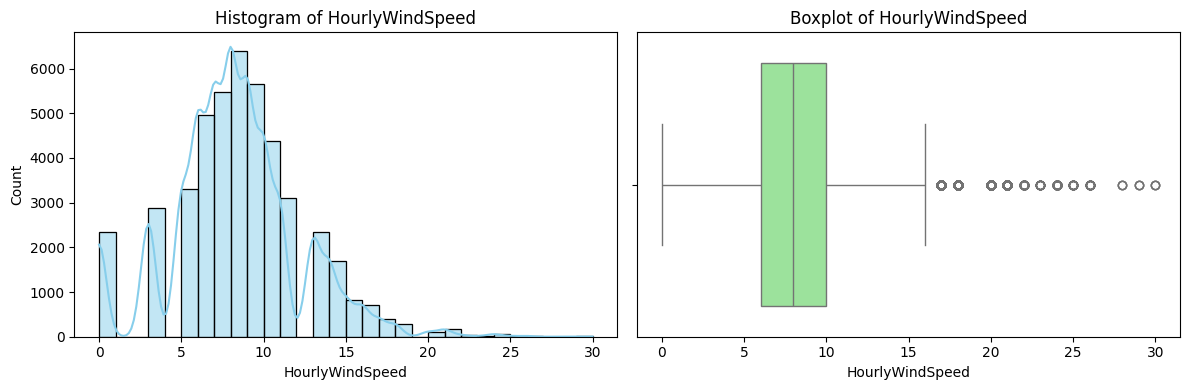

In [38]:
numeric_features = [
    "DEP_DELAY", "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed"
]

for col in numeric_features:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna(), color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis

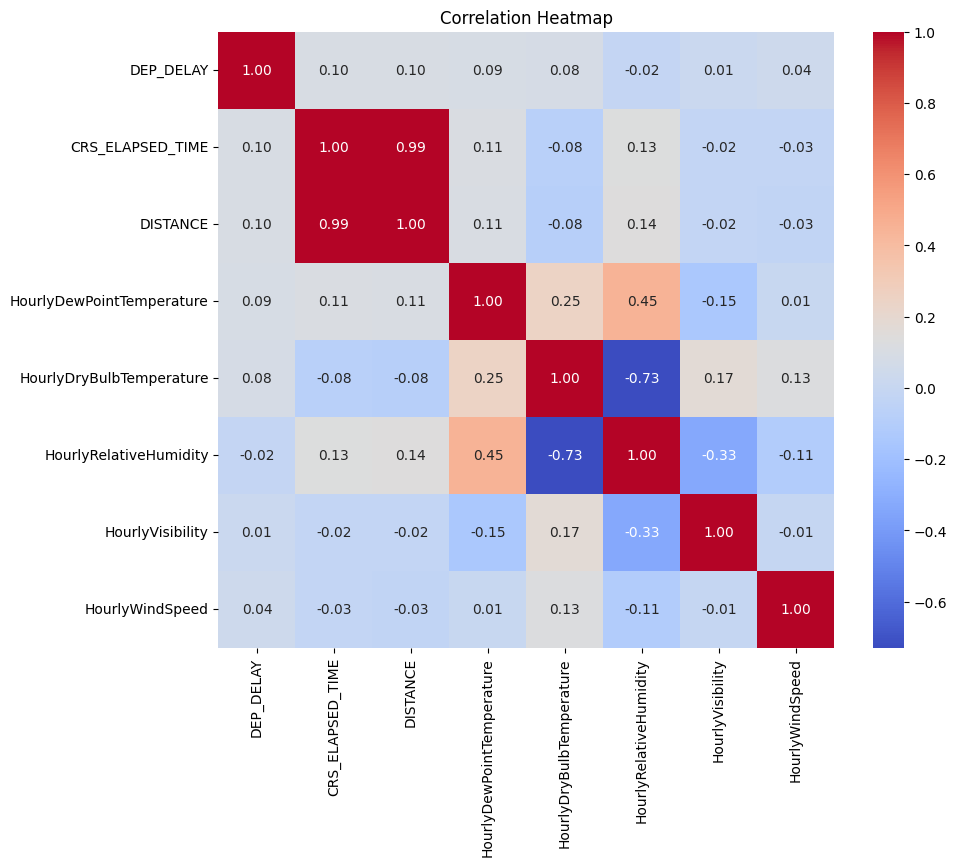

In [39]:
corr_features = [
    "DEP_DELAY", "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed"
]

corr_matrix = df[corr_features].corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


## Group-Level Statistics

C:\Users\PC\AppData\Local\Temp\ipykernel_36504\1365997467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis")


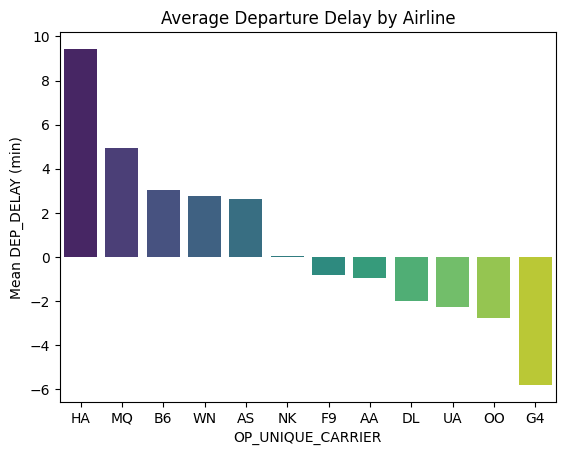

C:\Users\PC\AppData\Local\Temp\ipykernel_36504\1365997467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='DEP_DELAY', data=df, palette="mako")


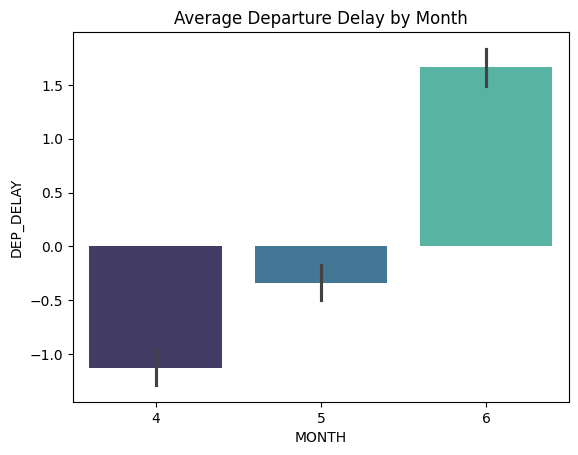

C:\Users\PC\AppData\Local\Temp\ipykernel_36504\1365997467.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df, palette="crest")


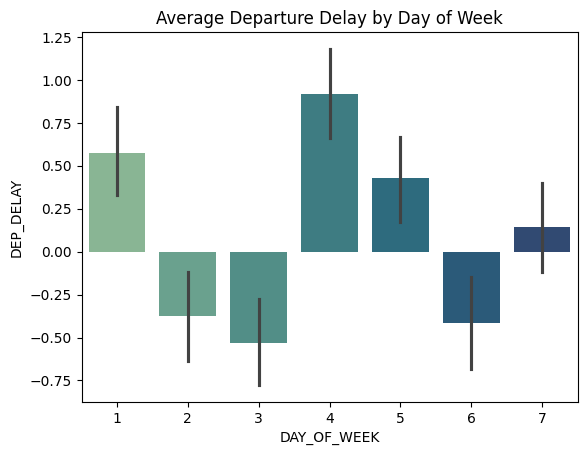

In [40]:
# Average delay by airline
carrier_delay = df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].mean().sort_values(ascending=False)
sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis")
plt.title("Average Departure Delay by Airline")
plt.ylabel("Mean DEP_DELAY (min)")
plt.show()

# Average delay by month
sns.barplot(x='MONTH', y='DEP_DELAY', data=df, palette="mako")
plt.title("Average Departure Delay by Month")
plt.show()

# Average delay by day of week
sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df, palette="crest")
plt.title("Average Departure Delay by Day of Week")
plt.show()


## Relationship Analysis

#### Does departure delay vary by distance group?

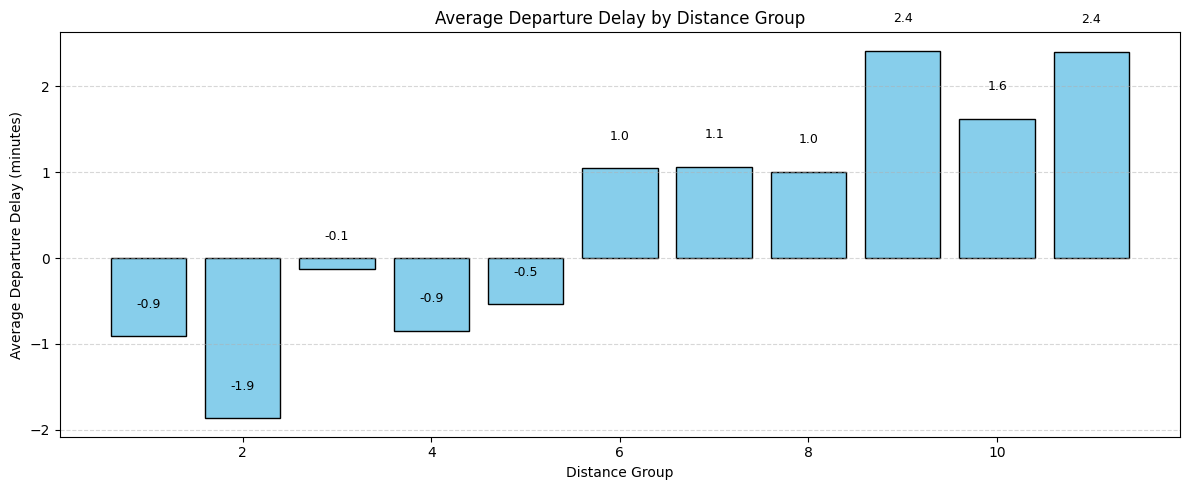

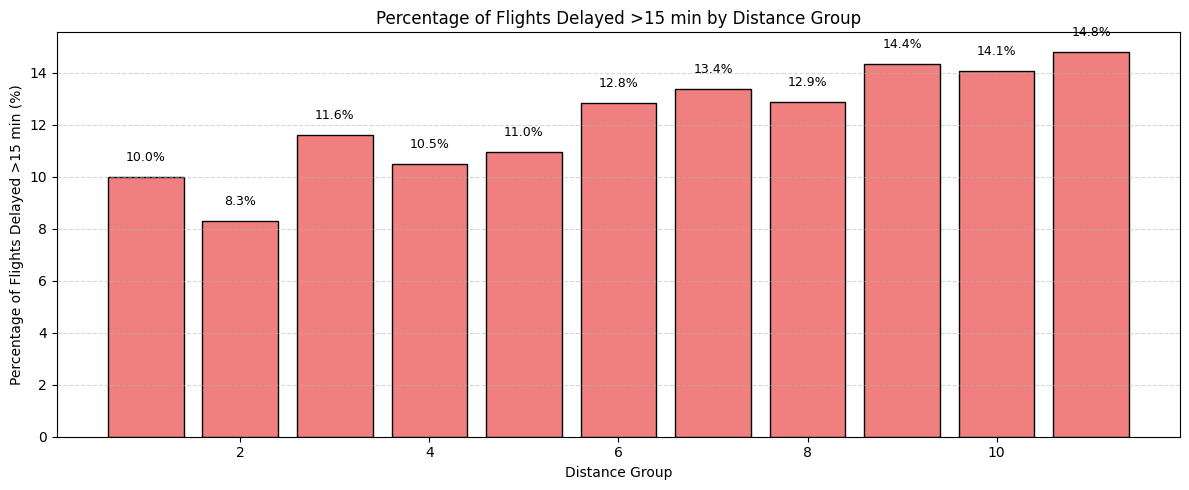

In [41]:
dist_stats = (
    df.groupby("DISTANCE_GROUP")
      .agg(
          AVG_DEP_DELAY=("DEP_DELAY", "mean"),  
          PCT_DELAYED_15=("DEP_DEL15", "mean"), 
          NUM_FLIGHTS=("DEP_DELAY", "count")
      )
      .reset_index()
)

# --- Average Delay by Distance Group ---
plt.figure(figsize=(12,5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["AVG_DEP_DELAY"],
               color="skyblue", edgecolor="black")

for bar, val in zip(bars, dist_stats["AVG_DEP_DELAY"]):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.3,
             f"{val:.1f}",
             ha='center', va='bottom', fontsize=9, color="black")

plt.xlabel("Distance Group")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Distance Group")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- % of Flights Delayed >15 min by Distance Group ---
plt.figure(figsize=(12,5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["PCT_DELAYED_15"] * 100,
               color="lightcoral", edgecolor="black")

for bar, val in zip(bars, dist_stats["PCT_DELAYED_15"] * 100):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.5,
             f"{val:.1f}%",
             ha="center", va="bottom", fontsize=9, color="black")

plt.xlabel("Distance Group")
plt.ylabel("Percentage of Flights Delayed >15 min (%)")
plt.title("Percentage of Flights Delayed >15 min by Distance Group")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### How does low visibility affect departure delays?

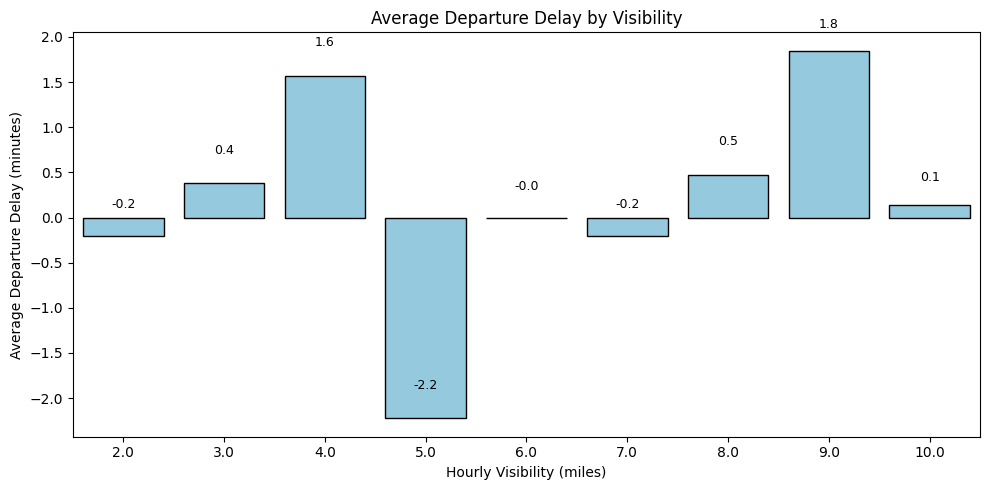

In [42]:
avg_delay_visibility = (
    df[df["HourlyVisibility"] >= 2]
      .groupby("HourlyVisibility")["DEP_DELAY"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(x="HourlyVisibility", y="DEP_DELAY", data=avg_delay_visibility,
            color="skyblue", edgecolor="black")

for i, v in enumerate(avg_delay_visibility["DEP_DELAY"].round(1)):
    plt.text(i, v + 0.3, str(v), ha="center", fontsize=9)

plt.xlabel("Hourly Visibility (miles)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Visibility")
plt.tight_layout()
plt.show()


#### Do stronger winds increase departure delays?

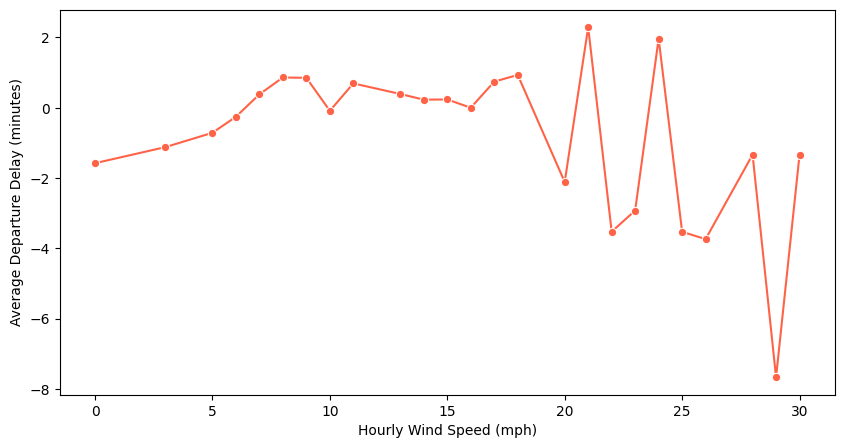

In [43]:
# Average Departure Delay vs Wind Speed
avg_delay_wind = df.groupby("HourlyWindSpeed")["DEP_DELAY"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="HourlyWindSpeed", y="DEP_DELAY", data=avg_delay_wind, marker="o", color="tomato")
plt.xlabel("Hourly Wind Speed (mph)")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()

### Bỏ

### Average Departure Delay by Dew Point Temperature

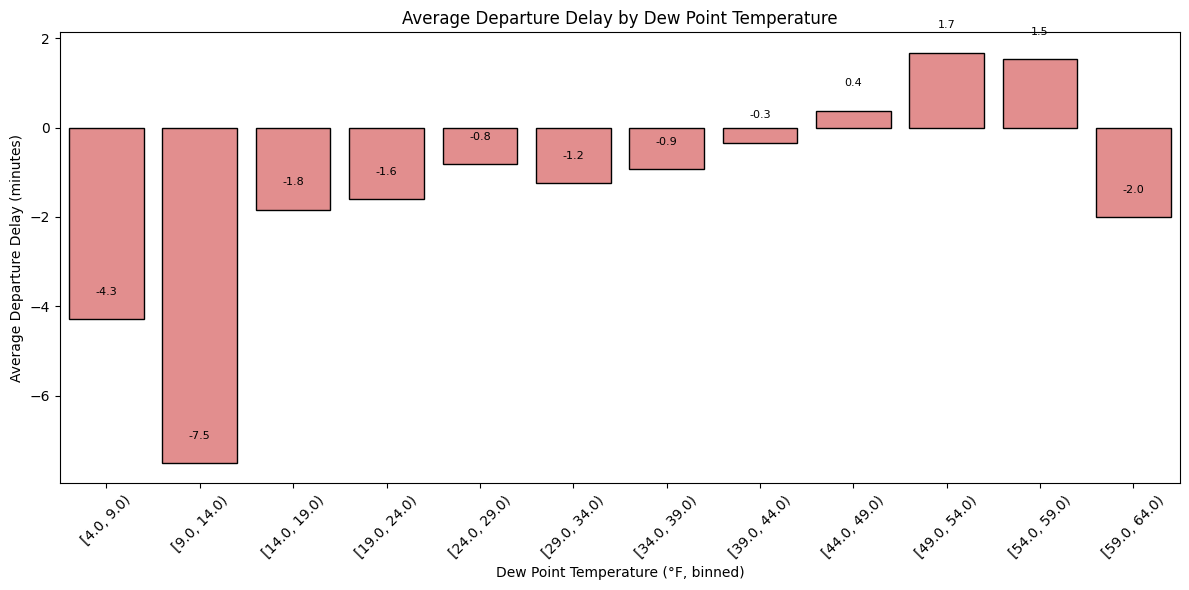

In [44]:
# Create bins every 5°F
bin_edges = np.arange(df["HourlyDewPointTemperature"].min()-1, 
                      df["HourlyDewPointTemperature"].max()+5, 5)

df["TempBin"] = pd.cut(df["HourlyDewPointTemperature"], bins=bin_edges, right=False)

temp_stats = (
    df.groupby("TempBin", observed=True)["DEP_DELAY"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
ax = sns.barplot(x="TempBin", y="DEP_DELAY", 
                 data=temp_stats, color="lightcoral", edgecolor="black")

for i, row in temp_stats.iterrows():
    ax.text(i, row.DEP_DELAY + 0.5, f"{row.DEP_DELAY:.1f}", 
            ha="center", va="bottom", fontsize=8)

plt.xlabel("Dew Point Temperature (°F, binned)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Dew Point Temperature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Statistical Significance Tests

#### T-test

In [45]:
if 'DEP_DEL15' in df.columns:
    delay_grp = df[df['DEP_DEL15']==1]['DEP_DELAY']
    ontime_grp = df[df['DEP_DEL15']==0]['DEP_DELAY']

    t_stat, p_val = stats.ttest_ind(delay_grp, ontime_grp, equal_var=False)
    print(f"T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-test statistic: 299.52, p-value: 0.0000


#### ANOVA

In [46]:
groups = [df[df['OP_UNIQUE_CARRIER']==c]['DEP_DELAY'] for c in df['OP_UNIQUE_CARRIER'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 286.74, p-value: 0.0000


C:\Users\PC\AppData\Local\Temp\ipykernel_36504\529799677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df, palette="Set3")


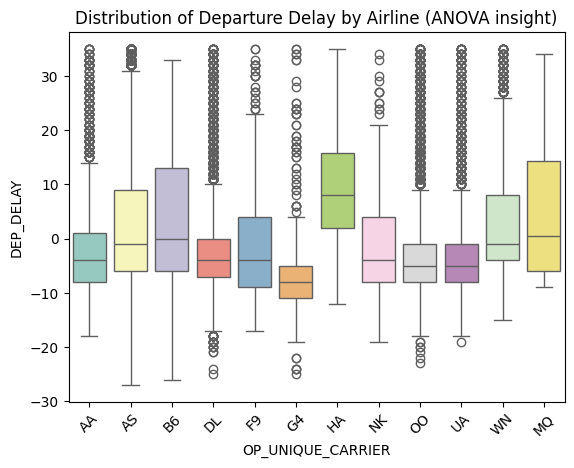

In [47]:
sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df, palette="Set3")
plt.title("Distribution of Departure Delay by Airline (ANOVA insight)")
plt.xticks(rotation=45)
plt.show()

In [48]:
remove_features = [
    'DEP_DELAY',
    'DEP_DELAY_NEW', 
    'DEP_DELAY_GROUP',
    'DEP_DEL15',
    'DISTANCE_GROUP'
]

X = df.select_dtypes(include=[np.number]).drop(
    columns=[col for col in remove_features if col in df.columns],
    errors='ignore'
)
y = df['DEP_DELAY']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# F-test
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(X_scaled, y)

# Table of F-scores and p-values
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_selector.scores_,
    'p_value': f_selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

f_scores.head(10)


,Feature,F_Score,p_value
3,CRS_DEP_TIME,1233.236282,1.444940e-266
0,MONTH,543.146824,1.982332e-119
6,DISTANCE,452.373201,6.801737e-100
5,CRS_ELAPSED_TIME,414.449106,1.019021e-91
7,HourlyDewPointTemperature,367.126578,1.667003e-81
8,HourlyDryBulbTemperature,317.993754,6.941378e-71
4,CRS_ARR_TIME,175.705951,4.988055e-40
11,HourlyWindSpeed,75.158081,4.486537e-18
1,DAY_OF_MONTH,17.808094,2.448182e-05
9,HourlyRelativeHumidity,17.741460,2.535410e-05


C:\Users\PC\AppData\Local\Temp\ipykernel_36504\102210860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_Score', y='Feature', data=f_scores.head(10), palette='crest')


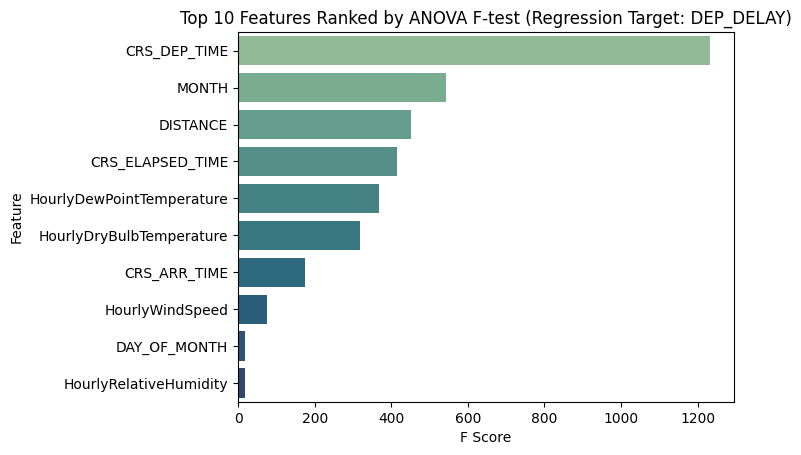

In [49]:
sns.barplot(x='F_Score', y='Feature', data=f_scores.head(10), palette='crest')
plt.title('Top 10 Features Ranked by ANOVA F-test (Regression Target: DEP_DELAY)')
plt.xlabel('F Score')
plt.ylabel('Feature')
plt.show()